In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
#Creating a path to the whale_returns.csv file

csvpath = Path("Resources/whale_returns.csv")

In [3]:
#Read in the CSV file into a DataFrame 

whale_returns_df = pd.read_csv(csvpath)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#Converting the dates to a DateTimeIndex

whale_returns_df = whale_returns_df.set_index(pd.to_datetime(whale_returns_df["Date"],infer_datetime_format=True))

#Drop the Extra Date column
whale_returns_df = whale_returns_df.drop(columns = ["Date"])
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Find nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
# Checking for nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Read in algorithmic returns
csvpath = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(csvpath)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
#Converting the dates to a DateTimeIndex

algo_returns_df = algo_returns_df.set_index(pd.to_datetime(algo_returns_df["Date"],infer_datetime_format=True))

#Drop the Extra Date column
algo_returns_df = algo_returns_df.drop(columns = ["Date"])
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Find nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
# Checking for nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# Read in S&P TSX 60 Closing Prices
csvpath = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(csvpath)
sp_tsx_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [12]:
#Converting the dates to a DateTimeIndex

sp_tsx_df = sp_tsx_df.set_index(pd.to_datetime(sp_tsx_df["Date"],infer_datetime_format=True))

#Drop the Extra Date column
sp_tsx_df = sp_tsx_df.drop(columns = ["Date"])
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Replacing currency symbols 

sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")
sp_tsx_df.head()

C:\BCdownloads\envs\devs\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
sp_tsx_df.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [17]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna().copy()
# Checking for nulls
sp_tsx_daily_returns.isnull().sum()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns = {"Close":"S&P TSX 60"})
sp_tsx_daily_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios_returns = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_daily_returns], axis="columns", join="inner")
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

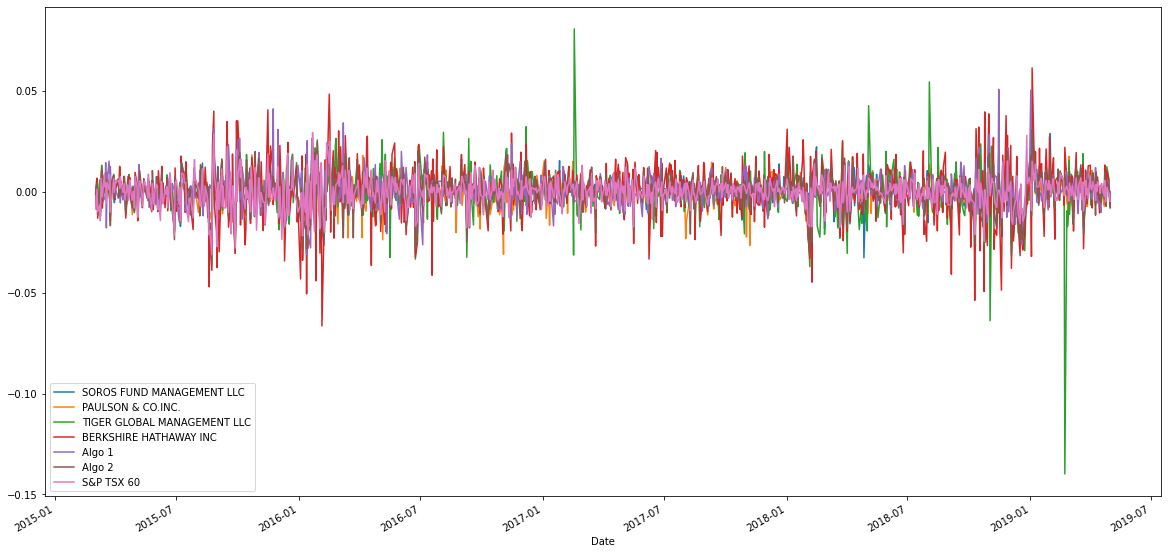

In [20]:
# Plot daily returns of all portfolios
all_portfolios_returns.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

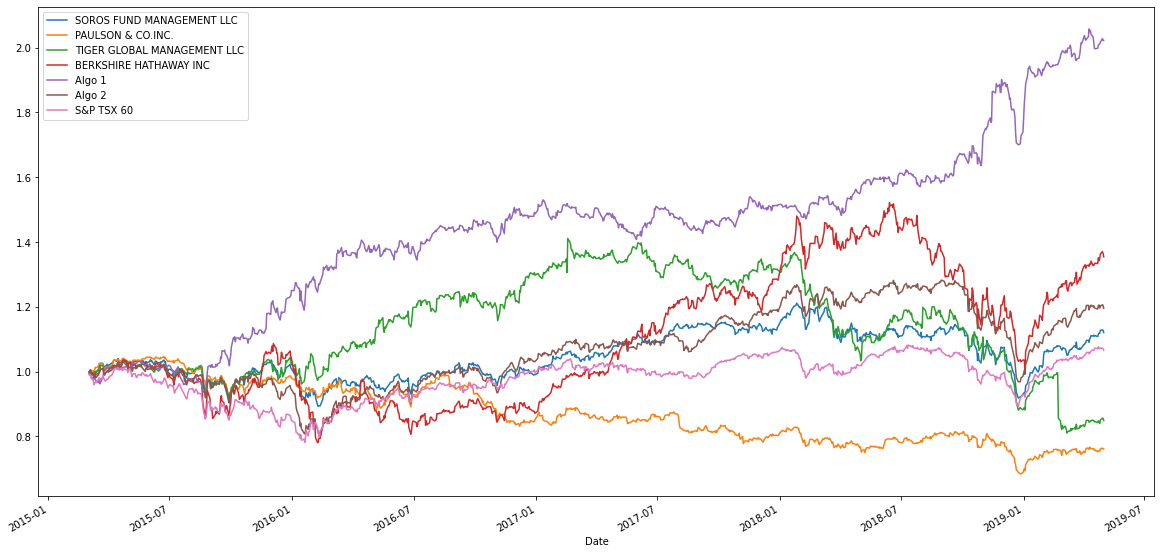

In [21]:
# Calculate cumulative returns of all portfolios
cumul_returns = (1+all_portfolios_returns).cumprod()
# Plot cumulative returns
cumul_returns.plot(figsize = (20,10))

<AxesSubplot:>

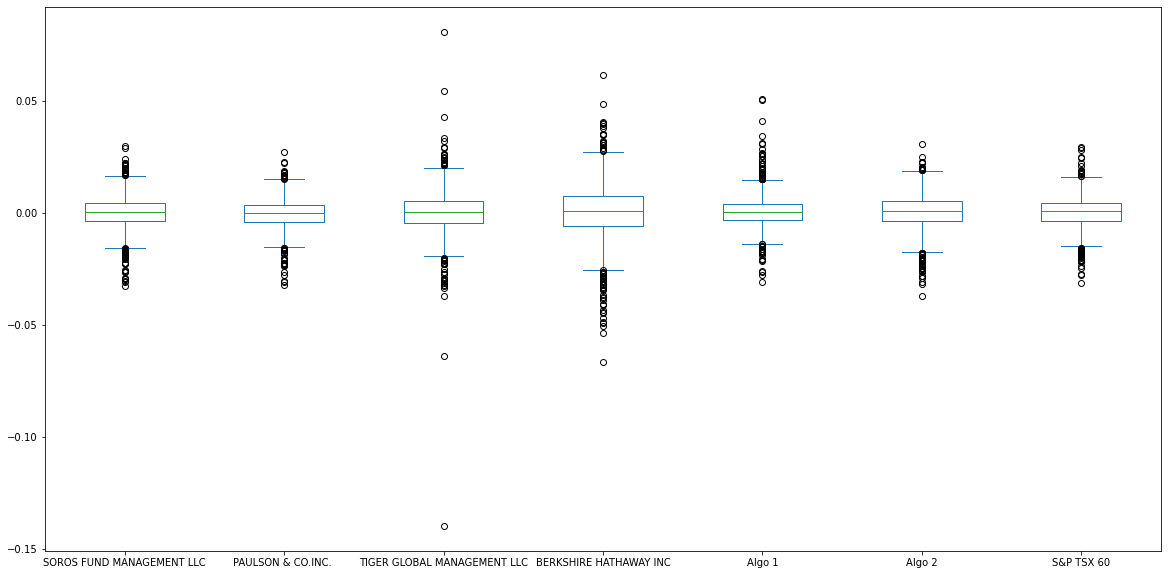

In [22]:
# Box plot to show risk
all_portfolios_returns.plot(kind = "box",figsize = (20,10))

In [23]:
# Calculate the daily standard deviations of all portfolios and sort values in descending order
all_returns_std = all_portfolios_returns.std().sort_values(ascending=False)
all_returns_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolio_riskier_sp_tsx_60 = [all_returns_std > all_returns_std["S&P TSX 60"]]
portfolio_riskier_sp_tsx_60

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 S&P TSX 60                     False
 PAULSON & CO.INC.              False
 dtype: bool]

In [25]:
# Calculate the annualized standard deviation 
annualized_std = all_returns_std *np.sqrt(252)
annualized_std.sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

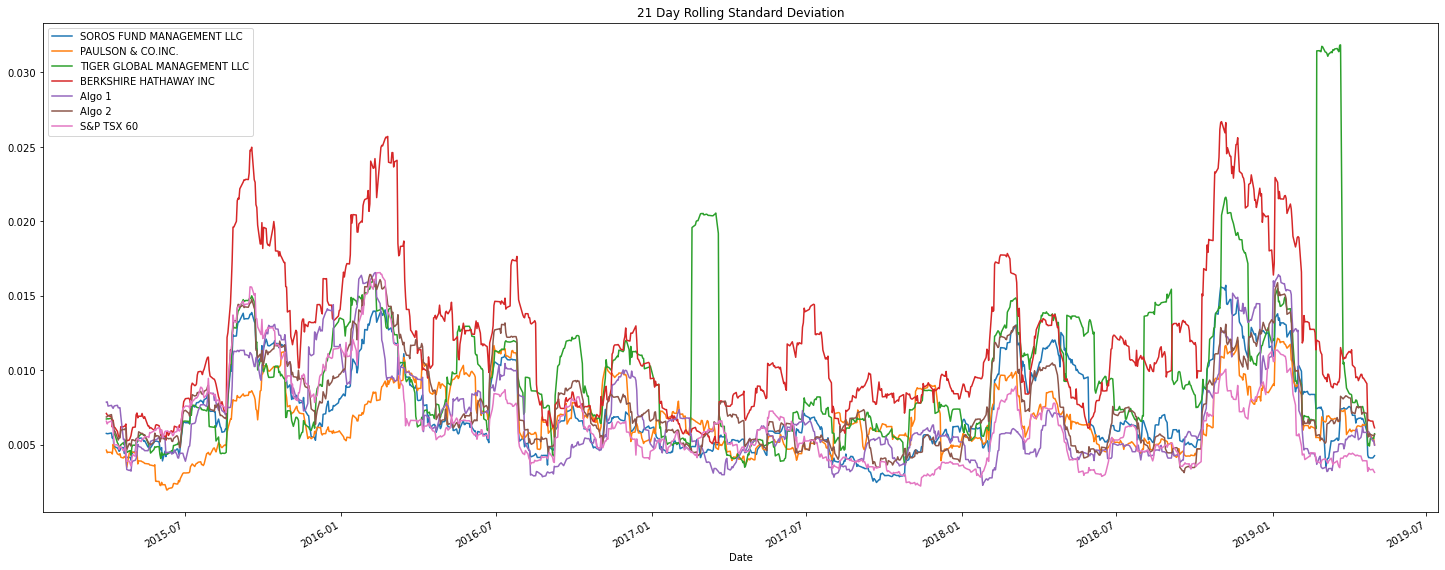

In [26]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation",figsize=(25,10))

<AxesSubplot:>

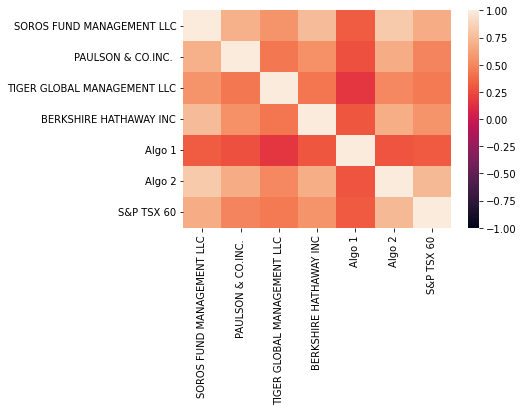

In [27]:
# Calculate the correlation and display the correlation matrix
correlation = all_portfolios_returns.corr()
correlation
#Plot correlation
sns.heatmap(correlation, vmin=-1, vmax=1)


<AxesSubplot:title={'center':'Algo 1 Rolling 60-Day Beta'}, xlabel='Date'>

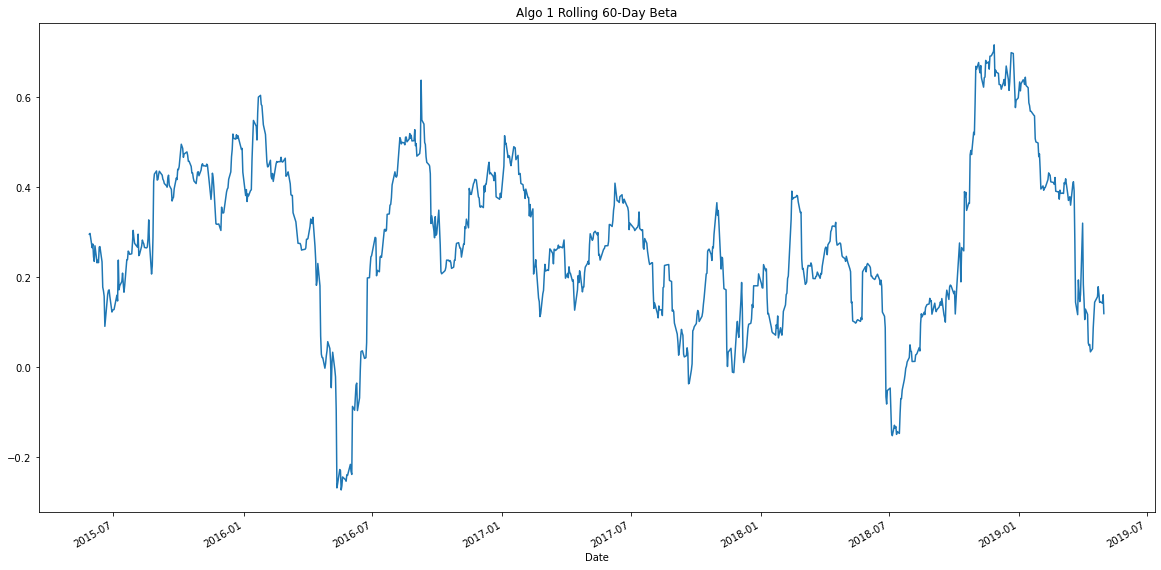

In [28]:
# Calculate covariance of a single portfolio
rolling_covariance_algo_1= all_portfolios_returns["Algo 1"].rolling(window=60).cov(all_portfolios_returns["S&P TSX 60"])
# Calculate variance of S&P TSX
rolling_variance_sp_tsx_60 = all_portfolios_returns["S&P TSX 60"].rolling(window=60).var()
# Computing beta
rolling_beta_algo_1 = rolling_covariance_algo_1/rolling_variance_sp_tsx_60
# Plot beta trend
rolling_beta_algo_1.plot(title="Algo 1 Rolling 60-Day Beta", figsize=(20,10))

<AxesSubplot:xlabel='Date'>

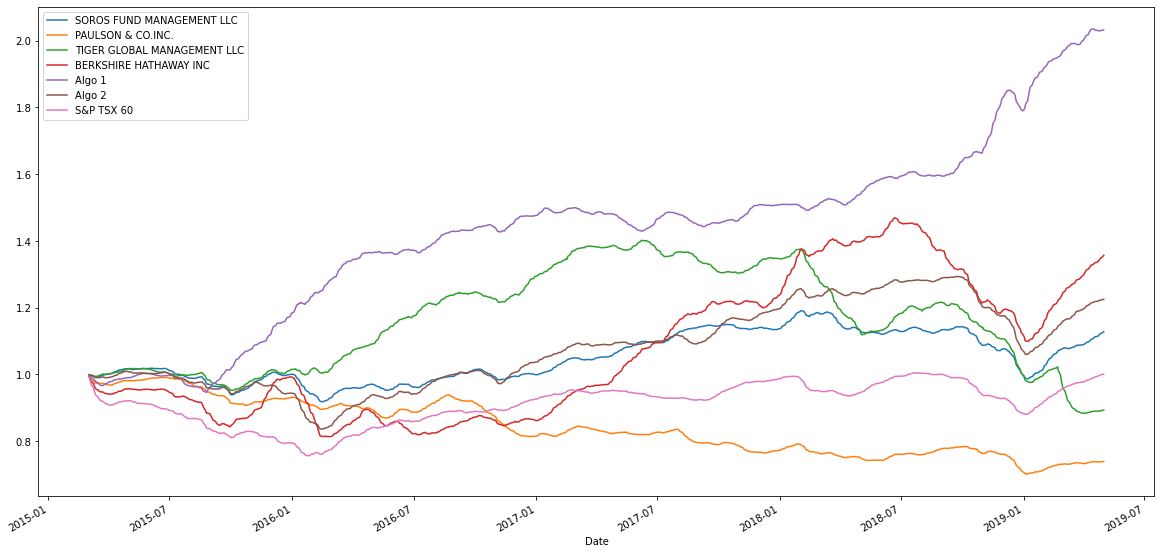

In [29]:
# Use to calculate the rolling window
portfolio_ewm = all_portfolios_returns.ewm(span = 21,adjust = False).mean()
(1+portfolio_ewm).cumprod().plot(figsize=(20,10))


In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = all_portfolios_returns.mean()*252/(all_portfolios_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

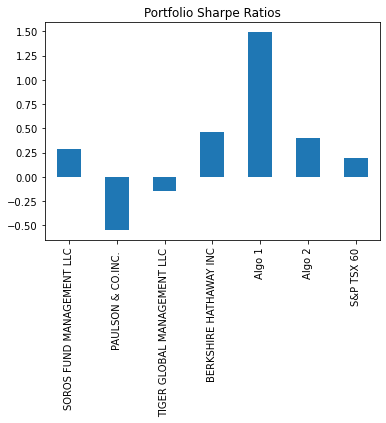

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Portfolio Sharpe Ratios")

In [ ]:
Algo 1 performed better than the market and all whale portfolios 